## E-commerce data exploration

#### Task description:
***
The goal is to explore provided data, understand it, create visualisations and make deductions of its nature.

Initially the idea was to create various analyses using the dataset, as it had a big potential. Unfortunately, the EDA shows that the data is very limited. Many promising variables are either low-detailed or anonymized, which is understable as the data was shared publicly on the Internet. This, however, does not allow to drive trustworthy conculsions and it is explained in consecutive steps of the EDA why certain approches are senseless.  

#### Data:
***
The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. It was provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil, which allows them to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

The dataset is available publicly under CC BY-NC-SA 4.0 license. Further information can be found at https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data
dt_orders = pd.read_csv('data/olist_orders_dataset.csv', parse_dates=True)
dt_pay = pd.read_csv('data/olist_order_payments_dataset.csv', parse_dates=True)
dt_rev = pd.read_csv('data/olist_order_reviews_dataset.csv', parse_dates=True)
dt_items = pd.read_csv('data/olist_order_items_dataset.csv', parse_dates=True)
dt_prod = pd.read_csv('data/olist_products_dataset.csv', parse_dates=True)
dt_cust = pd.read_csv('data/olist_customers_dataset.csv', parse_dates=True)
dt_translation = pd.read_csv('data/product_category_name_translation.csv', parse_dates=True)
# dt_sellers = pd.read_csv('data/olist_sellers_dataset.csv', parse_dates=True)

# Joining 
full_df = dt_orders\
    .merge(dt_items, on='order_id', how='inner')\
    .merge(dt_prod, on='product_id', how='left')\
    .merge(dt_translation, on='product_category_name', how='left')\
    .drop('product_category_name', axis=1) #in portuguese

In [3]:
full_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [3]:
with pd.option_context('display.max_columns', None):
    print (full_df.head(3))

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00              1   
1           2018-08-13 00:00:00              1   
2           2018-09-04 00:00:00            

In [5]:
# Filtering columns to those worth exploring in the beginning
full_df = full_df[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_item_id','product_id', 'price', 'freight_value','product_description_lenght','product_category_name_english']]
full_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_description_lenght,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,268.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,178.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,232.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,468.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,316.0,stationery


### Exploratory data analysis

In [6]:
# Shape:
print('Table size {}'.format(full_df.shape))

print("\nMax number of products bought at once: ", dt_items[['order_item_id']].max()[0])
# print("\nMax number of products bought at once: ",  dt_items['order_item_id'].value_counts().max())
print("The most popular product: {}. Times bought: {}. Product category: {}".format(
    dt_items['product_id'].value_counts().index[0], dt_items['product_id'].value_counts().max(), 
    full_df[full_df.product_id=='aca2eb7d00ea1a7b8ebd4e68314663af']['product_category_name_english'].tolist()[0]
    ))

Table size (112650, 9)

Max number of products bought at once:  21
The most popular product: aca2eb7d00ea1a7b8ebd4e68314663af. Times bought: 527. Product category: furniture_decor


In [7]:
full_df.describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


### Dates

In [26]:
full_df['date'] = full_df.order_purchase_timestamp.str[:10]
print('First transaction in dataset: ', full_df.date.min())
print('Last transaction in dataset: ', full_df.date.max())

# Switching to monthly details 
full_df['date'] = full_df.order_purchase_timestamp.str[:7]
# full_df['date'] = full_df['date']/a
print('First month in dataset and number of transactions: ', full_df[full_df.date==full_df.date.min()]['date'].value_counts())
print('Last month in dataset and number of transactions: ', full_df[full_df.date==full_df.date.max()]['date'].value_counts())
print('The month with the most transactions: ', full_df['date'].value_counts()[:1:])

First transaction in dataset:  2016-09-04
Last transaction in dataset:  2018-09-03
First month in dataset and number of transactions:  2016-09    6
Name: date, dtype: int64
Last month in dataset and number of transactions:  2018-09    1
Name: date, dtype: int64
The month with the most transactions:  2017-11    8665
Name: date, dtype: int64


Text(0, 0.5, 'Count of transactions')

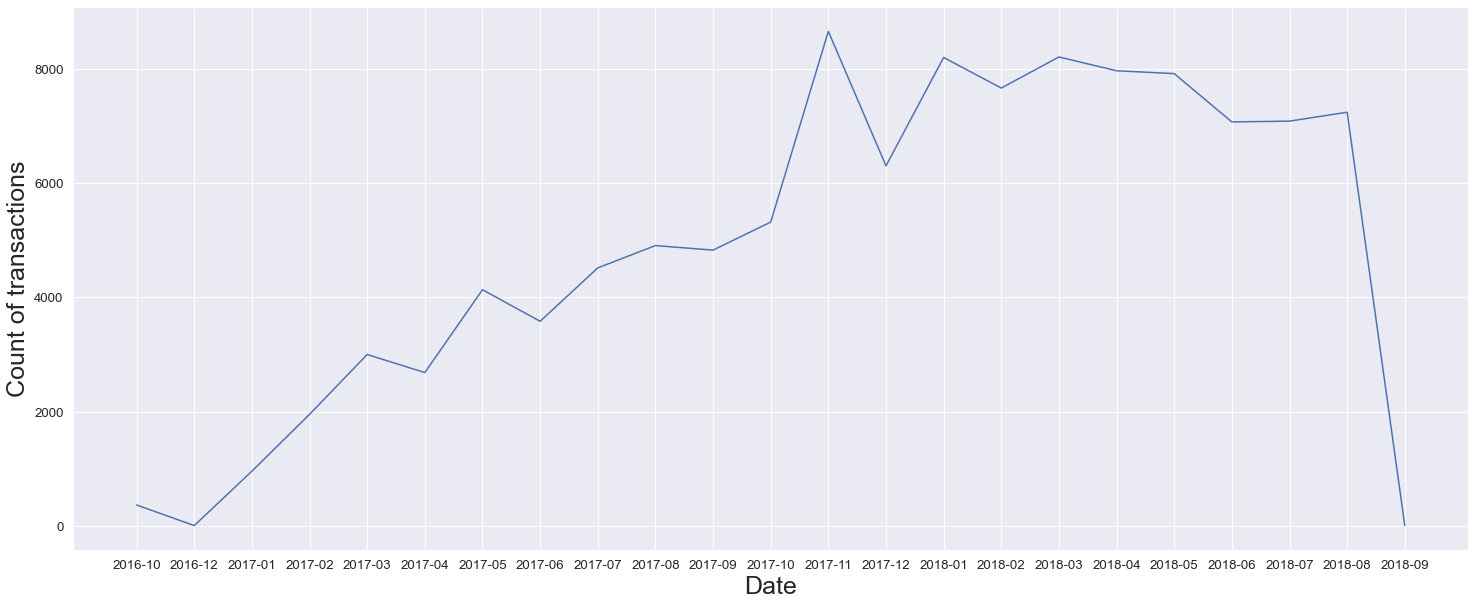

In [41]:
fig,ax = plt.subplots(figsize=(25,10))
sns.set(font_scale = 1.2)
sns.lineplot(x = full_df['date'].value_counts().sort_index()[1:].index, y=full_df['date'].value_counts().sort_index()[1:])
plt.xlabel('Date', fontsize=25)
plt.ylabel('Count of transactions', fontsize=25)
# ticks_all = full_df['date'].value_counts()[1:].index
# ticks_sel = list(ticks_all[::2])
# plt.xticks(ticks_sel)

The number of transactions at the beginning of the dataset is tiny, with just a few transactions per month. It is quickly increasing, with 2000 transactions in the 5th month. The peak is in November 2017 and it starts the best period for the website, with 7-8k transactions monthly. The last transaction in the dataset happens at the beginning of 2018-09, which means 2 years data was provided.

It looks like the business has opened in 2016-09, which would explain the small number of purchases. But, as a lot of data manipulation and anonymization was performed before sharing, this would need to be confirmed by the data provider. 

Considering relatively short period which data covers and the characteristic for new businesses growing number of transactions, the above chart is not sufficient to state if seasonality (for example related to holidays) is present and deeper analysis would be needed.

### Customers

In [238]:
print('Maximum number of orders done by unique customer: ', dt_orders['customer_id'].value_counts().max())

Maximum number of orders done by unique customer:  1


According to the data, no customer made more than one purchase ever. Because 2-years transactional data is available, the complete lack of returning or loyal customers is unlikely. This suggest that the anonymization of customers was on order level, not customer one.

This unfortunately greatly reduces the possible analyses that could be done with this data.   

### Products

In [8]:
dt_prod.count()
prod_times_bought = pd.DataFrame(full_df.product_id.value_counts())
print('Perc of products bought more than once', (prod_times_bought[prod_times_bought.product_id>1].count())/(dt_prod['product_id'].count()))
print('Perc of products bought more than 10 times',(prod_times_bought[prod_times_bought.product_id>10].count())/(dt_prod['product_id'].count()))

Perc of products bought more than once product_id    0.450184
dtype: float64
Perc of products bought more than 10 times product_id    0.050621
dtype: float64


It seems that products are not anonymized on individual purchased items, but rather on general order level - there are multiple transactions per product. However, almost half (45%) of items was purchased only once. This also limits the possible analyses.

In [42]:
full_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_description_lenght,product_category_name_english,date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,268.0,housewares,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,178.0,perfumery,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,232.0,auto,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,468.0,pet_shop,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,316.0,stationery,2018-02


### Nulls

In [9]:
full_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
product_id                          0
price                               0
freight_value                       0
product_category_name_english    1627
dtype: int64

In [28]:
full_df.product_category_name_english.nunique()

71

The data has some missing values for product types, which is a categorical variable with 71 different values. The provided information in the dataset does not allow to 'find' them and perform any imputation. As in the first clustering this variable will not be used, right now this column is not a problem and dropping the nulls is not required (would cause losing 1% of data).

However, this categorical variable variable is used later on and the missing values are there addressed.  

### Outliers

<ipython-input-4-607cc362a5f1>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


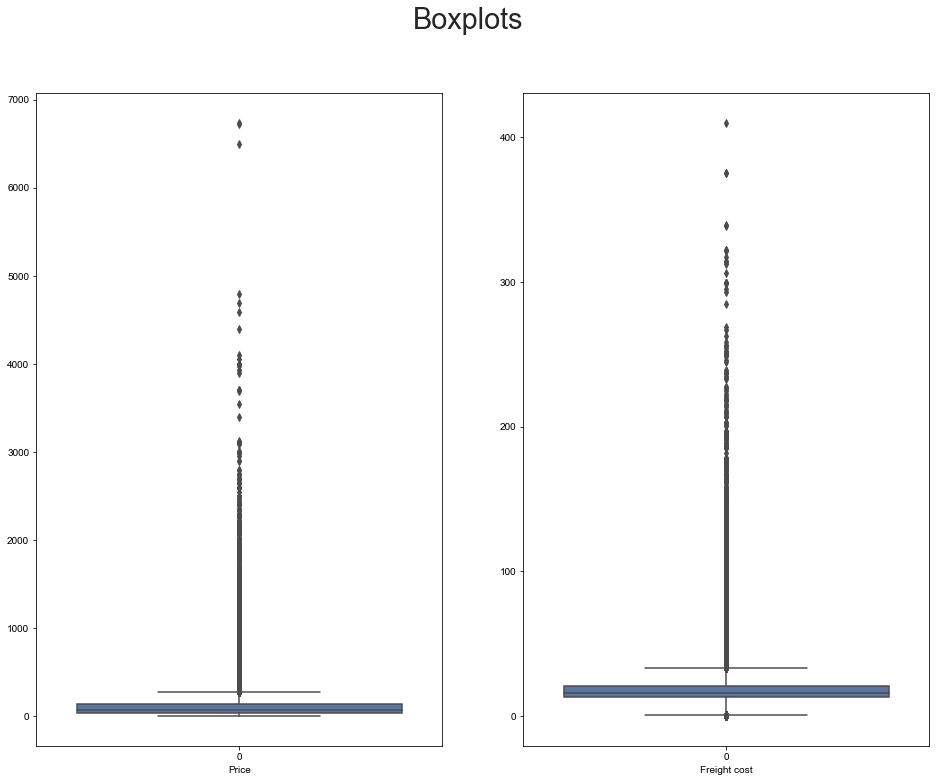

In [4]:
fig,ax = plt.subplots(figsize=(14,10))
fig, ax = plt.subplots(1,2)
sns.set(style="whitegrid", font_scale=2)
sns.boxplot(data=full_df['price'], ax=ax[0]).set(xlabel='Price')
sns.boxplot(data=full_df['freight_value'], ax=ax[1]).set(xlabel='Freight cost')
fig.suptitle('Boxplots')
fig.show()

In [73]:
full_df[full_df.price>5000]

,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,freight_value,product_category_name_english
3925,f5136e38d1a14a4dbd87dff67da82701,3fd6777bbce08a352fddd04e4a7cc8f6,delivered,2017-05-24 18:14:34,1bdf5e6731585cf01aa8169c7028d6ad,6499.0,227.66,art
25071,0812eb902a67711a1cb742b3cdaa65ae,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,489ae2aa008f021502940f251d4cce7f,6735.0,194.31,housewares
32077,fefacc66af859508bf1a7934eab1e97f,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,69c590f7ffc7bf8db97190b6cb6ed62e,6729.0,193.21,computers


In [74]:
full_df[full_df.freight_value>350]

,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,freight_value,product_category_name_english
57086,a77e1550db865202c56b19ddc6dc4d53,4eed76c1aafeceac4250e202ca9b1a5a,delivered,2018-04-16 14:57:21,ec31d2a17b299511e7c8627be9337b9b,979.00,409.68,baby
84927,076d1555fb53a89b0ef4d529e527a0f6,f08306b95370e8d5f0d97b71229284b6,delivered,2018-07-30 10:04:21,a3cd9517ebf5a50dca25acce54f3b171,2338.08,375.28,housewares
111396,3fde74c28a3d5d618c00f26d51baafa0,f2c743697f9b2ff2902df23a16582d80,delivered,2018-08-13 14:07:50,a3cd9517ebf5a50dca25acce54f3b171,2338.08,375.28,housewares


In [11]:
iqr = full_df.quantile(0.75) - full_df.quantile(0.25)
full_df_iqr = full_df[~((full_df < (full_df.quantile(0.25) - 1.5 * iqr)) |(full_df > (full_df.quantile(0.75) + 1.5 * iqr))).any(axis=1)]

<ipython-input-12-5a1fa1222804>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


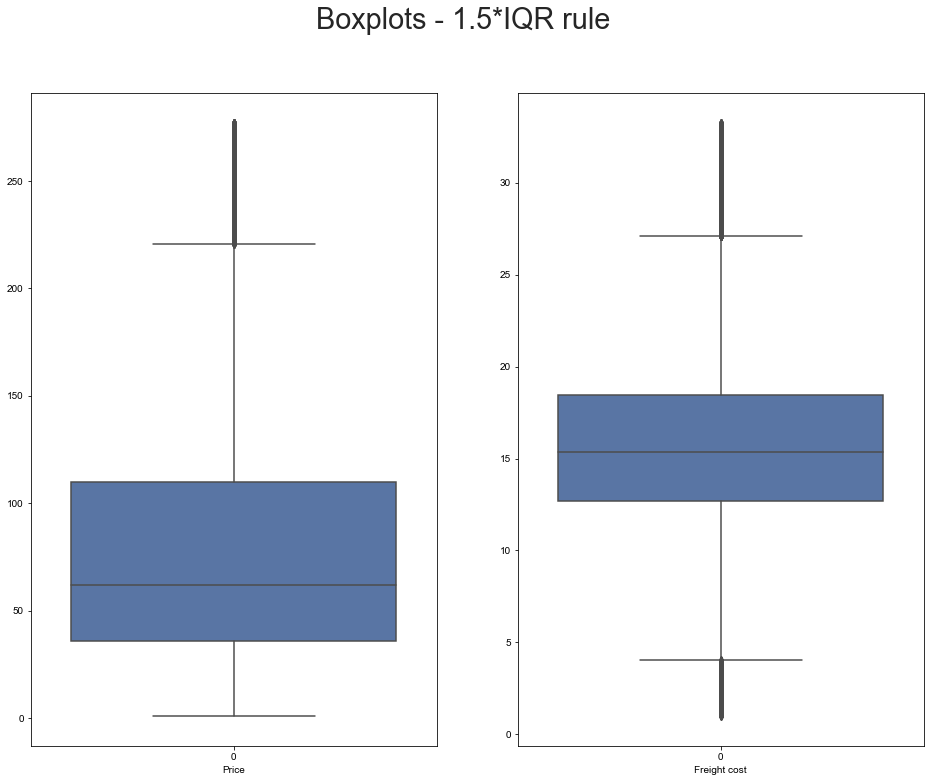

In [12]:
plt.rcParams["figure.figsize"] = (16,12)
fig, ax = plt.subplots(1,2)
sns.set(style="whitegrid", font_scale=2)
sns.boxplot(data=full_df_iqr['price'], ax=ax[0]).set(xlabel='Price')
sns.boxplot(data=full_df_iqr['freight_value'], ax=ax[1]).set(xlabel='Freight cost')
fig.suptitle('Boxplots - 1.5*IQR rule')
fig.show()

There are multiple observations that fall outside of the interquartile ranges for the Price and Freight value. However, there are no reasons to believe these are faulty records. In fact, there are only a few values cleary outstanding from the rest of the population. 